<center>
<img src =data/welcome.gif width = 500 />
</center>

In [251]:
import pandas as pd

In [252]:
data_set_loc = "data/abalone/abalone.data"
column_name = "Rings"
column_names = ["Sex", "Length", "Diameter", "Height", "WholeWeight", "ShuckedWeight", "VisceraWeight", "ShellWeight", "Rings"]

In [253]:
abalone = pd.read_csv(data_set_loc, names=column_names, index_col=0, na_values='NA')

In [254]:
abalone.head()

,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
Sex,,,,,,,,
M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [255]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

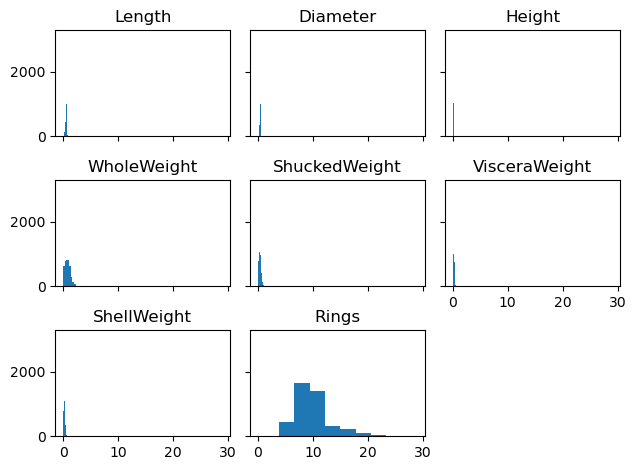

In [256]:
_ = abalone.hist(sharex=True, sharey=True, grid=False)
plt.tight_layout()

In [257]:
col_data = abalone[column_name]

(array([0.00145354, 0.03685147, 0.14090769, 0.11867711, 0.02813024,
        0.01949451, 0.00855022, 0.00247956, 0.00034201, 0.00025651]),
 array([ 1. ,  3.8,  6.6,  9.4, 12.2, 15. , 17.8, 20.6, 23.4, 26.2, 29. ]),
 <BarContainer object of 10 artists>)

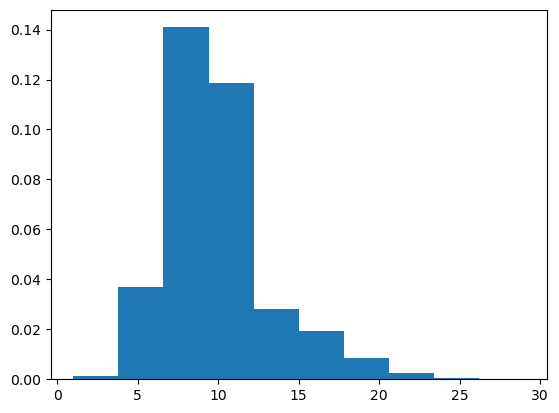

In [258]:
plt.hist(col_data, 10, density = True)

In [259]:
from scipy.optimize import newton

Text(1.4706070287539936, -0.2, '$x_{n+1}$')

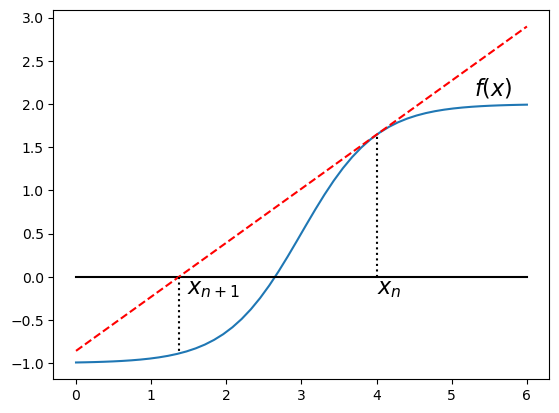

In [260]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# some function
func = lambda x: 3./(1 + 400*np.exp(-2*x)) - 1
xvals = np.linspace(0, 6)
plt.plot(xvals, func(xvals))
plt.text(5.3, 2.1, '$f(x)$', fontsize=16)

# zero line
plt.plot([0,6], [0,0], 'k-')

# value at step n
plt.plot([4,4], [0,func(4)], 'k:')
plt.text(4, -.2, '$x_n$', fontsize=16)

# tangent line
tanline = lambda x: -0.858 + 0.626*x
plt.plot(xvals, tanline(xvals), 'r--')

# point at step n+1
xprime = 0.858/0.626
plt.plot([xprime, xprime], [tanline(xprime), func(xprime)], 'k:')
plt.text(xprime+.1, -.2, '$x_{n+1}$', fontsize=16)

In [261]:
from scipy.special import psi, polygamma

# Note that log_mean and mean_log are parameters of the dlgamma function
dlgamma = lambda m, log_mean, mean_log: np.log(m) - psi(m) - log_mean + mean_log
dl2gamma = lambda m, *args: 1./m - polygamma(1, m)

In [262]:
# Calculate statistics
log_mean = abalone.mean().apply(np.log)
log_mean

Length          -0.646279
Diameter        -0.896779
Height          -1.969573
WholeWeight     -0.187846
ShuckedWeight   -1.023410
VisceraWeight   -1.711506
ShellWeight     -1.432000
Rings            2.295931
dtype: float64

In [263]:
mean_log = abalone.apply(np.log).mean()
mean_log

Length          -0.678669
Diameter        -0.933727
Height               -inf
WholeWeight     -0.440341
ShuckedWeight   -1.290916
VisceraWeight   -1.973340
ShellWeight     -1.671808
Rings            2.245679
dtype: float64

In [264]:
# Alpha MLE for Rings
alpha_mle = newton(dlgamma, 2, dl2gamma, args=(log_mean[-1], mean_log[-1]))
alpha_mle

10.113528445934062

In [265]:
# Beta MLE for Rings
beta_mle = alpha_mle/abalone.mean()[-1]
beta_mle

1.0181044590332484

In [266]:
abalone_mean = abalone.mean(numeric_only=True)
abalone_mean

Length           0.523992
Diameter         0.407881
Height           0.139516
WholeWeight      0.828742
ShuckedWeight    0.359367
VisceraWeight    0.180594
ShellWeight      0.238831
Rings            9.933684
dtype: float64

In [267]:
abalone_var = abalone.var(numeric_only=True)
abalone_var

Length            0.014422
Diameter          0.009849
Height            0.001750
WholeWeight       0.240481
ShuckedWeight     0.049268
VisceraWeight     0.012015
ShellWeight       0.019377
Rings            10.395266
dtype: float64

In [268]:
alpha_mom = abalone_mean ** 2 / abalone_var
alpha_mom

Length           19.037711
Diameter         16.892548
Height           11.125919
WholeWeight       2.855995
ShuckedWeight     2.621299
VisceraWeight     2.714380
ShellWeight       2.943647
Rings             9.492599
dtype: float64

In [269]:
alpha_mom[-1]

9.49259860218886

In [270]:
beta_mom = abalone_var / abalone_mean
beta_mom

Length           0.027524
Diameter         0.024146
Height           0.012540
WholeWeight      0.290176
ShuckedWeight    0.137095
VisceraWeight    0.066532
ShellWeight      0.081134
Rings            1.046466
dtype: float64

In [271]:
beta_mom[-1]

1.0464662921955166

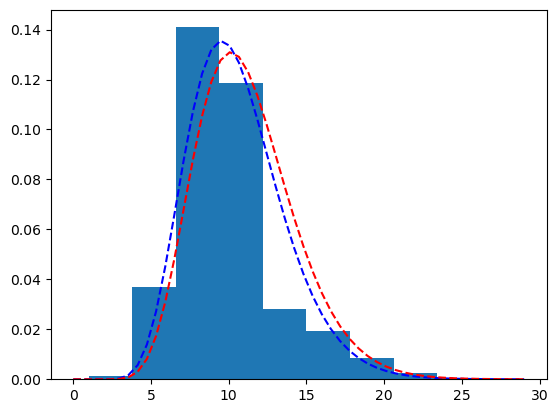

In [272]:
from scipy.stats.distributions import gamma

rings = abalone.Rings
rings.hist(density=True, bins=10, grid=False)
x = np.linspace(0, rings.max())
plt.plot(x, gamma.pdf(x, alpha_mom[-1], beta_mom[-1]), 'b--')
plt.plot(x, gamma.pdf(x, alpha_mle, beta_mle), 'r--')

<center>
<img src =data/ohOneMoreThing.jpg width = 500 />
</center>

#### Please state what was wrong with Professor's first example of the sampling of the bimodal distribution to illustrate the Central Limit Theorem.

Below is the answer

if you go through the professor code of first example of bimodal distribution to illustrate the Central Limit Theorem, there is very small error.

In [273]:
x1 = np.random.normal(0, 2, 10000)
x2 = np.random.normal(5, 1, 10000)
x = np.r_[x1, x2]
len(x)

20000

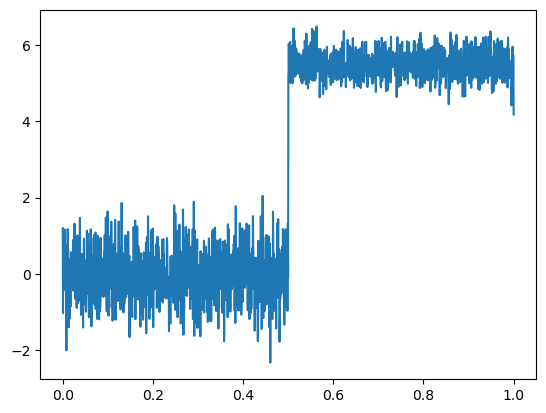

In [274]:
mean_10 = [sum(x[i:i+11]) / 10. for i in range(0, 20000, 10)]
plt.plot(np.linspace(0, 1, 2000), mean_10)
#Here he meant to calculate the mean of 10 elements but according to code it is calculating mean of 11 elements except last sum of 10 elements

(array([0.00227081, 0.01476026, 0.05904102, 0.15214418, 0.27703865,
        0.28271567, 0.20664358, 0.1044572 , 0.02952051, 0.00681243,
        0.        , 0.        , 0.        , 0.        , 0.0011354 ,
        0.01021864, 0.17598767, 0.53477543, 0.34856912, 0.06471805]),
 array([-2.32070622, -1.88033446, -1.43996269, -0.99959092, -0.55921916,
        -0.11884739,  0.32152438,  0.76189614,  1.20226791,  1.64263968,
         2.08301145,  2.52338321,  2.96375498,  3.40412675,  3.84449851,
         4.28487028,  4.72524205,  5.16561381,  5.60598558,  6.04635735,
         6.48672912]),
 <BarContainer object of 20 artists>)

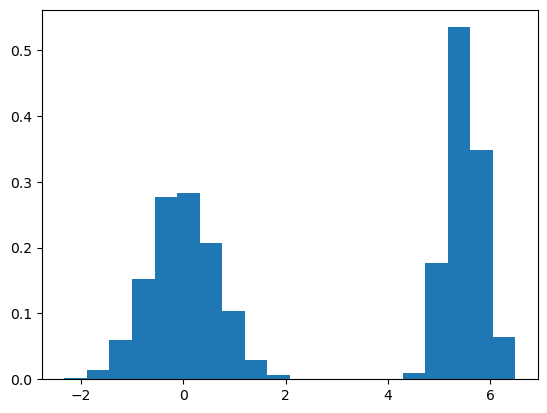

In [275]:
plt.hist(mean_10, 20, density = True)

(array([0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
        0.      , 0.005   , 0.071875, 0.245625, 0.229375, 0.068125,
        0.005   , 0.      , 0.      , 0.009375, 0.385   , 0.22875 ,
        0.001875, 0.      ]),
 array([-8. , -7.2, -6.4, -5.6, -4.8, -4. , -3.2, -2.4, -1.6, -0.8,  0. ,
         0.8,  1.6,  2.4,  3.2,  4. ,  4.8,  5.6,  6.4,  7.2,  8. ]),
 <BarContainer object of 20 artists>)

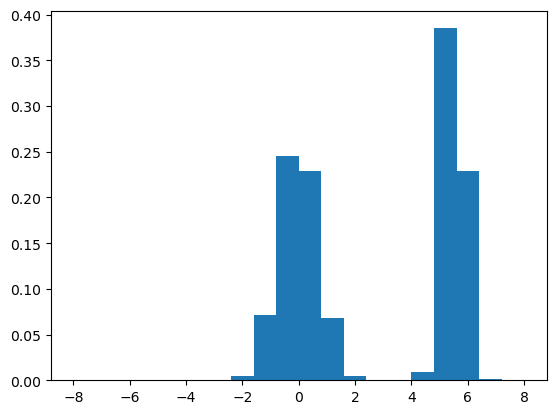

In [276]:
plt.hist(mean_10, 20, range=[-8, 8], density = True)

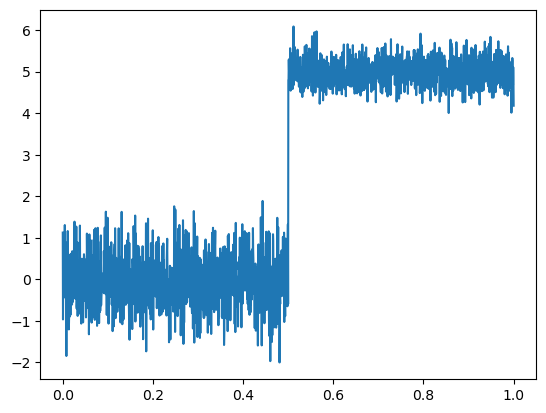

In [277]:
#here is the correct code
mean_10 = [sum(x[i:i+10]) / 10. for i in range(0, 20000, 10)]
plt.plot(np.linspace(0, 1, 2000), mean_10)

## Why `(i:i+11)` is Wrong and `(i:i+10)` is Correct for CLT

In the context of the Central Limit Theorem (CLT) and calculating the mean of sample means, the choice of window size is crucial. Here's an explanation of why using a window size of `(i:i+11)` is incorrect, while `(i:i+10)` is appropriate:

- The CLT applies to a scenario where you are calculating the mean of sample means. In your case, you are calculating the mean of sample means with a window size of 10 (`i:i+10`) and then plotting these means.

- In the CLT, it's essential that the sample means are calculated from independent and identically distributed random variables. In the second option, you are using a window size of 10, ensuring that each mean is calculated from a sample of 10 data points. This aligns with the principles of the CLT, where larger sample sizes are often used to approximate the distribution of sample means.

- On the other hand, the first option uses a window size of 11 (`i:i+11`), which results in overlapping samples between adjacent means. This can lead to non-independence between the sample means, violating the fundamental assumption of the CLT.

So, when considering the Central Limit Theorem, it's more appropriate to use a window size of 10 (as in the second option) to ensure that each mean is calculated from a non-overlapping set of 10 data points, preserving the independence and i.i.d. characteristics required by the CLT.


(array([0.00494501, 0.03585129, 0.0939551 , 0.20769023, 0.30535409,
        0.27939281, 0.1780202 , 0.09519136, 0.03090628, 0.00494501,
        0.        , 0.        , 0.        , 0.        , 0.0024725 ,
        0.04697755, 0.38447418, 0.56991188, 0.21510774, 0.01730752]),
 array([-2.00255991, -1.59811142, -1.19366293, -0.78921444, -0.38476595,
         0.01968254,  0.42413103,  0.82857951,  1.233028  ,  1.63747649,
         2.04192498,  2.44637347,  2.85082196,  3.25527045,  3.65971894,
         4.06416743,  4.46861592,  4.8730644 ,  5.27751289,  5.68196138,
         6.08640987]),
 <BarContainer object of 20 artists>)

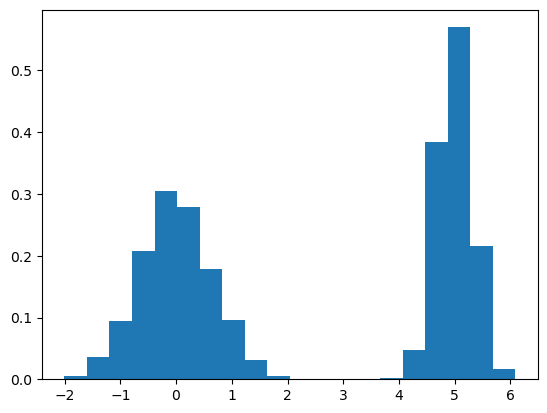

In [278]:
plt.hist(mean_10, 20, density = True)

(array([0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
        0.      , 0.0025  , 0.063125, 0.25125 , 0.2375  , 0.066875,
        0.00375 , 0.      , 0.      , 0.16875 , 0.4375  , 0.01875 ,
        0.      , 0.      ]),
 array([-8. , -7.2, -6.4, -5.6, -4.8, -4. , -3.2, -2.4, -1.6, -0.8,  0. ,
         0.8,  1.6,  2.4,  3.2,  4. ,  4.8,  5.6,  6.4,  7.2,  8. ]),
 <BarContainer object of 20 artists>)

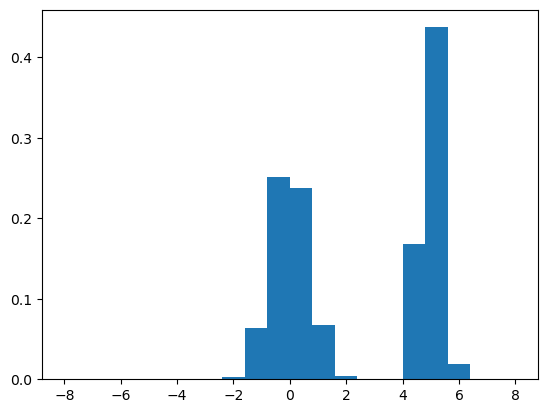

In [279]:
plt.hist(mean_10, 20, range=[-8, 8], density = True)

In [280]:
#same with this
mean_100 = [sum(exp_variates[i : i + 101]) / 100. for i in range(0, 20000, 100)]
plt.plot(np.linspace(0, 1, 200), mean_100)
#same issue with this also but if you notice it should have been x list not exp_variates, so the output generated in that code was based on wrong data

NameError: name 'exp_variates' is not defined

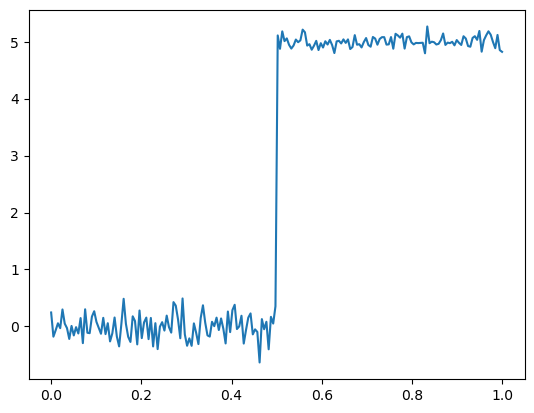

In [281]:
#here is the correct code with correct dataset
mean_100 = [sum(x[i : i + 100]) / 100. for i in range(0, 20000, 100)]
plt.plot(np.linspace(0, 1, 200), mean_100)

(array([0.11861174, 0.62694775, 0.72861495, 0.22027894, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.66083682, 1.03361656]),
 array([-0.63374425, -0.33866384, -0.04358343,  0.25149698,  0.54657739,
         0.8416578 ,  1.13673821,  1.43181862,  1.72689904,  2.02197945,
         2.31705986,  2.61214027,  2.90722068,  3.20230109,  3.4973815 ,
         3.79246191,  4.08754232,  4.38262273,  4.67770315,  4.97278356,
         5.26786397]),
 <BarContainer object of 20 artists>)

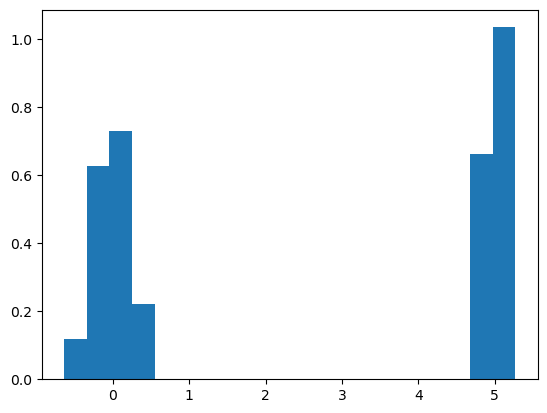

In [282]:
plt.hist(mean_100, 20, density = True)

(array([0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
        0.     , 0.     , 0.325  , 0.3    , 0.     , 0.     , 0.     ,
        0.     , 0.00625, 0.61875, 0.     , 0.     , 0.     ]),
 array([-8. , -7.2, -6.4, -5.6, -4.8, -4. , -3.2, -2.4, -1.6, -0.8,  0. ,
         0.8,  1.6,  2.4,  3.2,  4. ,  4.8,  5.6,  6.4,  7.2,  8. ]),
 <BarContainer object of 20 artists>)

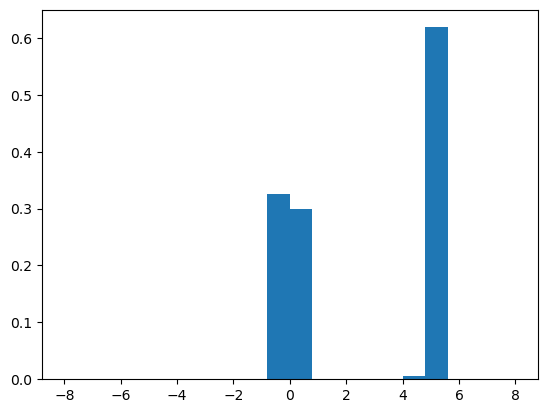

In [283]:
plt.hist(mean_100, 20, range=[-8, 8], density = True)

## Below is some experiment

<center>
<img src =data/experiment.gif width = 500 />
</center>

In [284]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_and_plot_moving_mean(x, window_size, num_bins=20, range_=None):
    moving_mean = [sum(x[i : i + window_size]) / window_size for i in range(0, len(x), window_size)]

    # Plot the moving mean
    plt.figure(figsize=(12, 4))  
    plt.subplot(1, 3, 1)
    plt.plot(np.linspace(0, 1, len(moving_mean)), moving_mean)
    plt.xlabel("Time")
    plt.ylabel("Moving Mean")
    plt.title(f"Moving Mean (Window Size = {window_size})")
    
    # Create histograms of the moving mean
    
    plt.subplot(1, 3, 2)
    plt.hist(moving_mean, num_bins, density=True)
    plt.xlabel("Value")
    plt.ylabel("Density")
    plt.title("Histogram of Moving Mean")
    
    plt.subplot(1, 3, 3)
    plt.hist(moving_mean, num_bins, density=True, range=range_)
    plt.xlabel("Value")
    plt.ylabel("Density")
    plt.title("Histogram of Moving Mean")

    plt.tight_layout()
    plt.show()

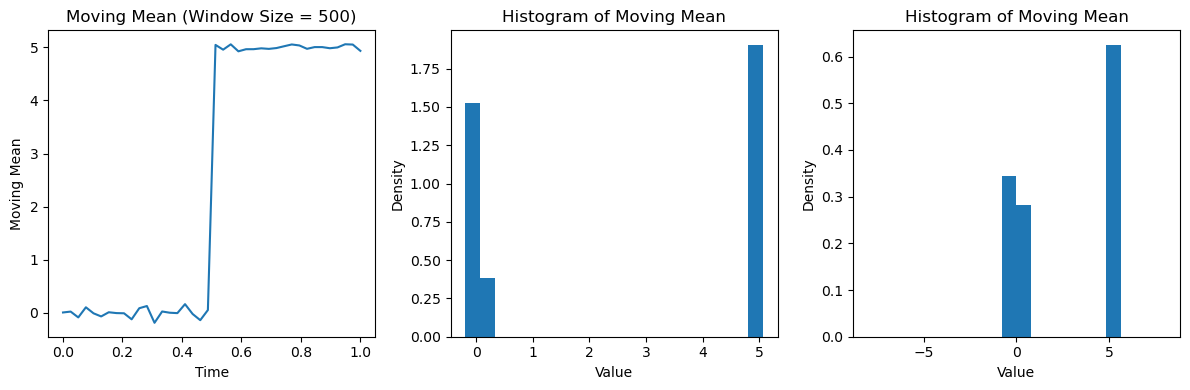

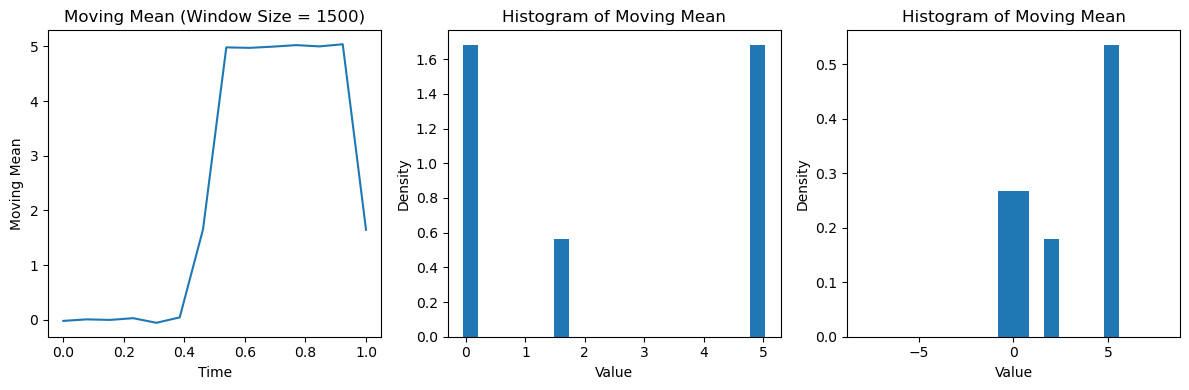

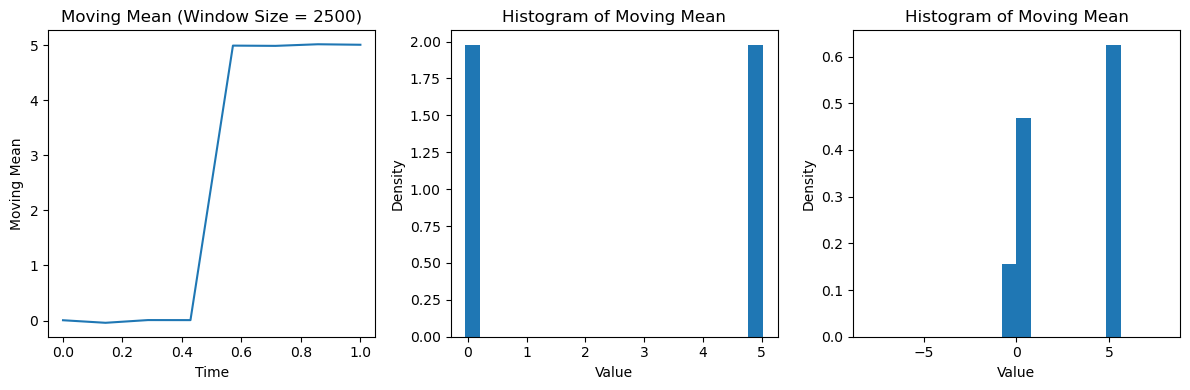

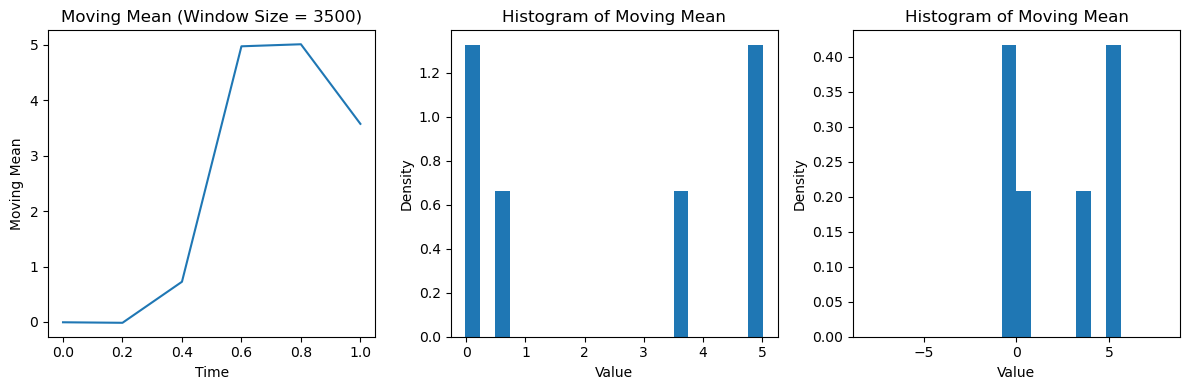

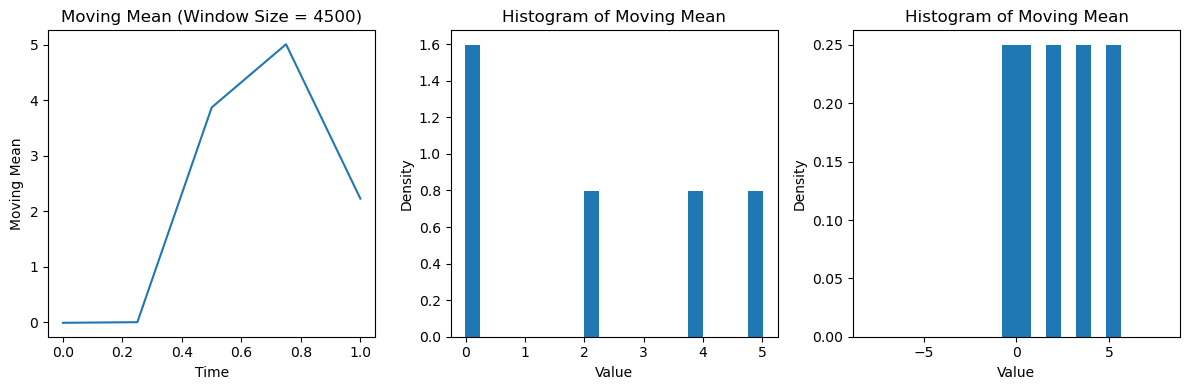

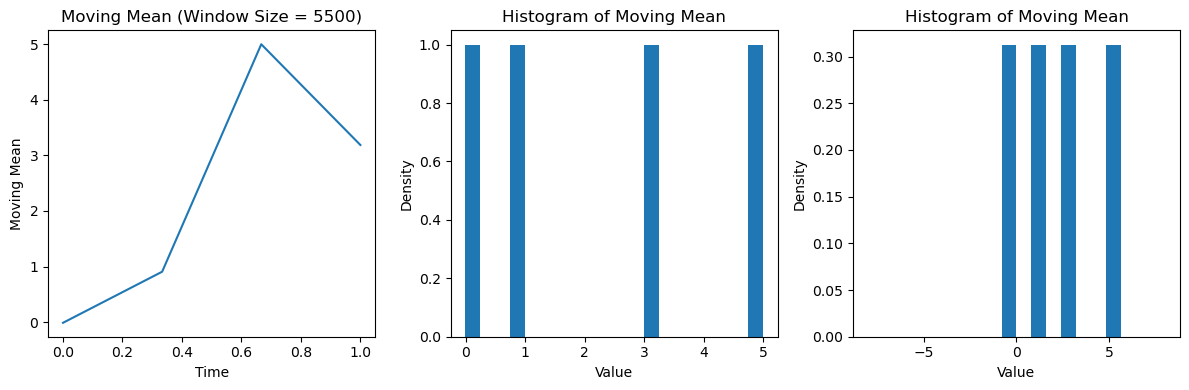

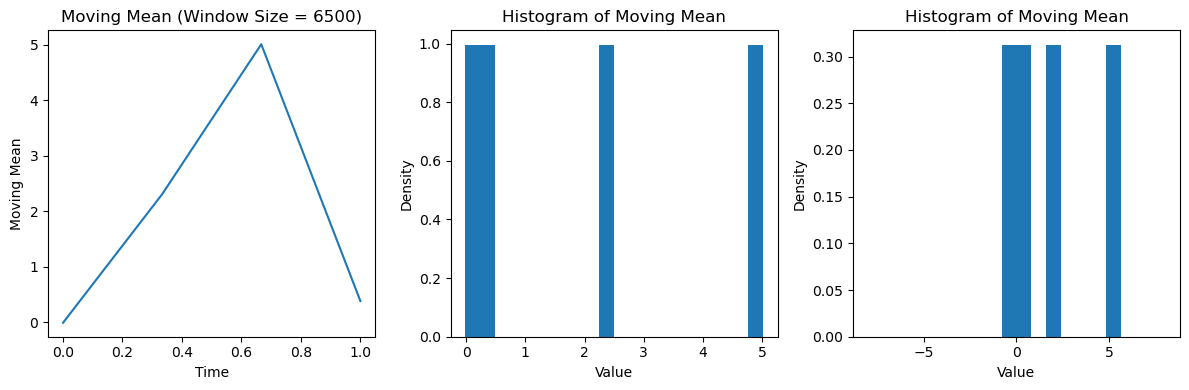

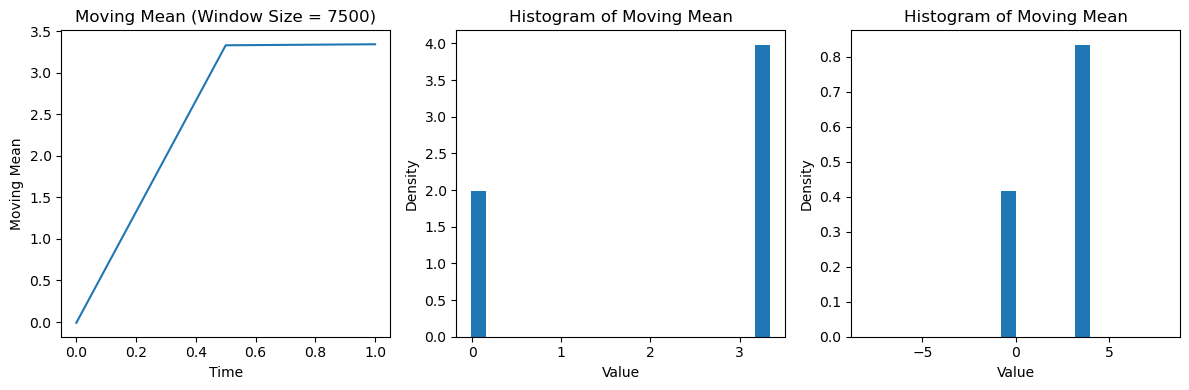

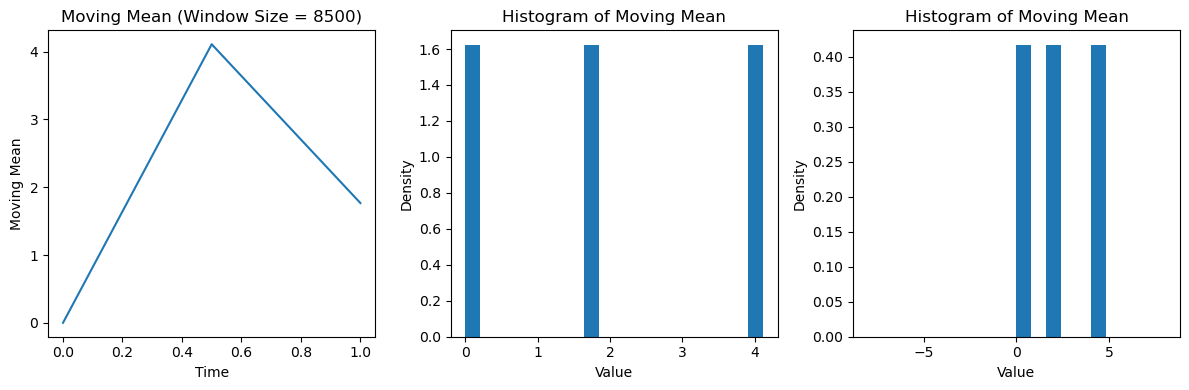

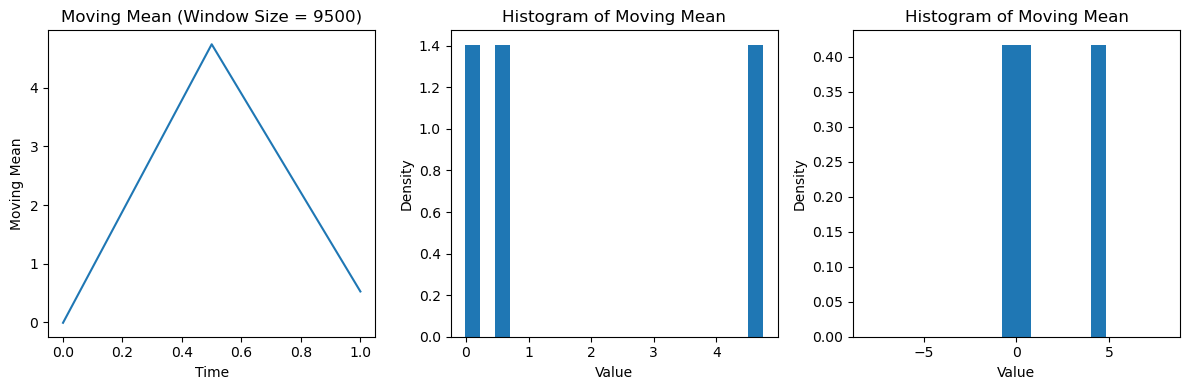

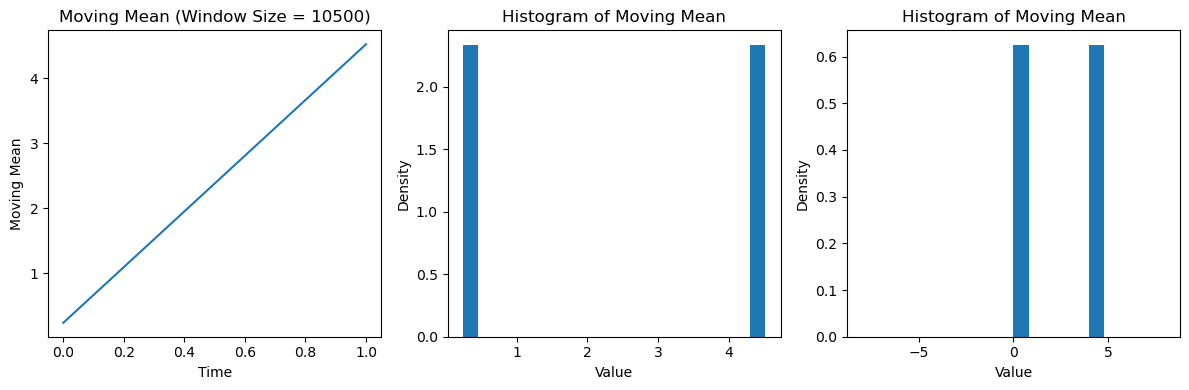

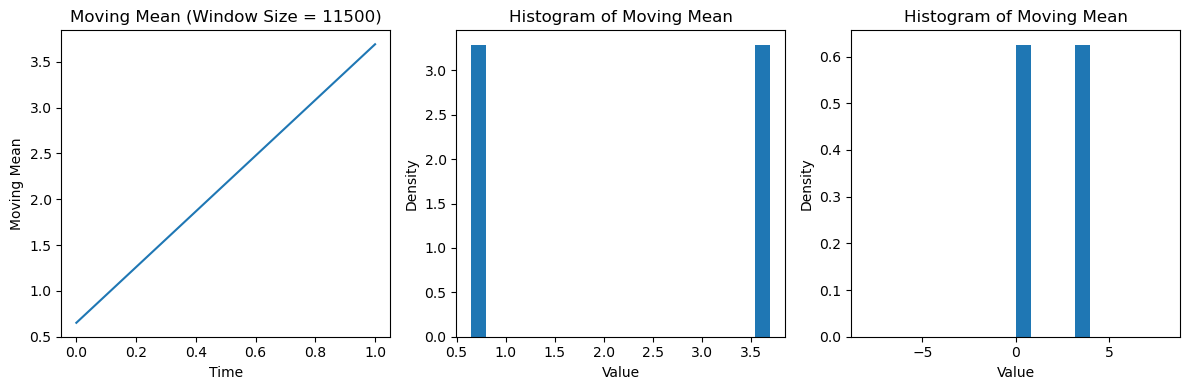

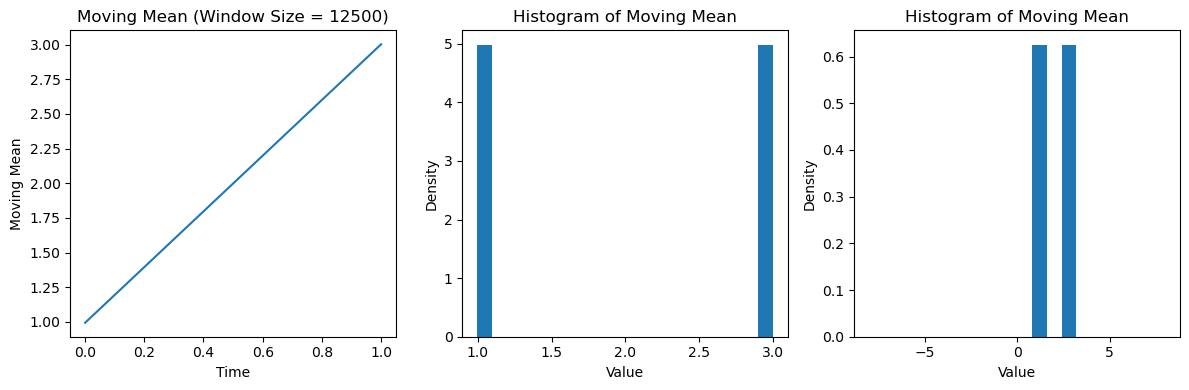

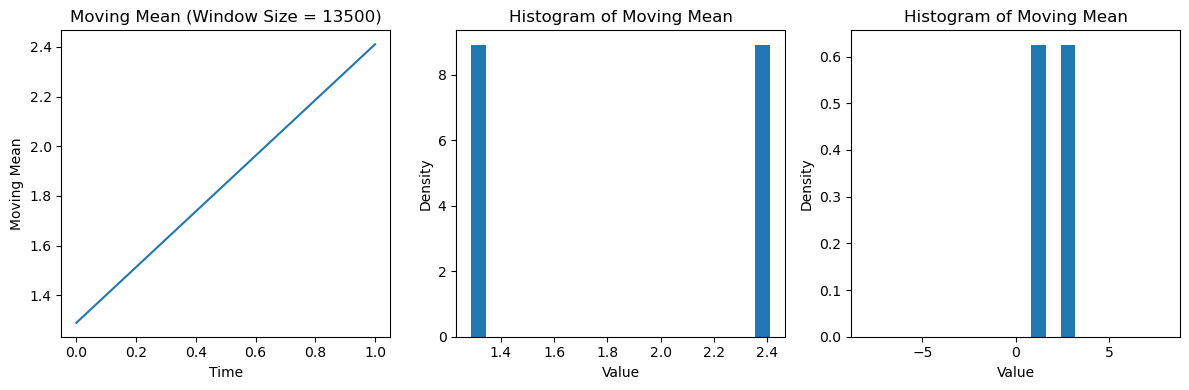

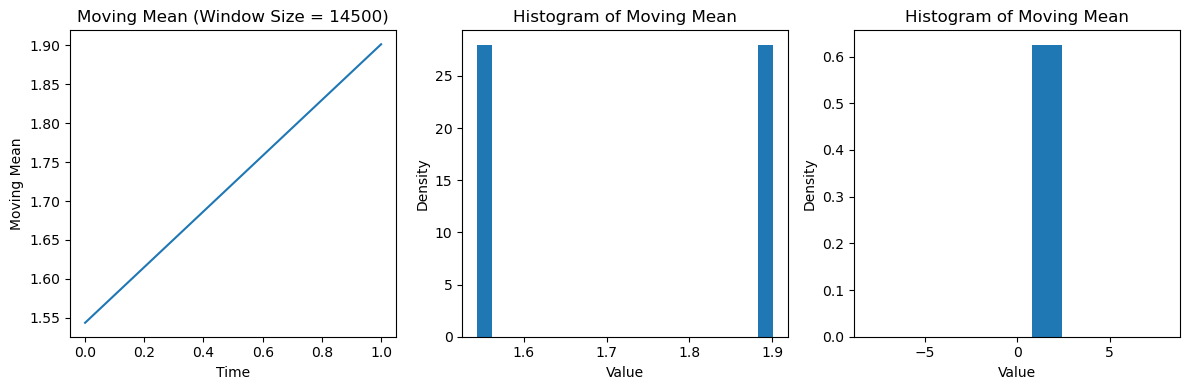

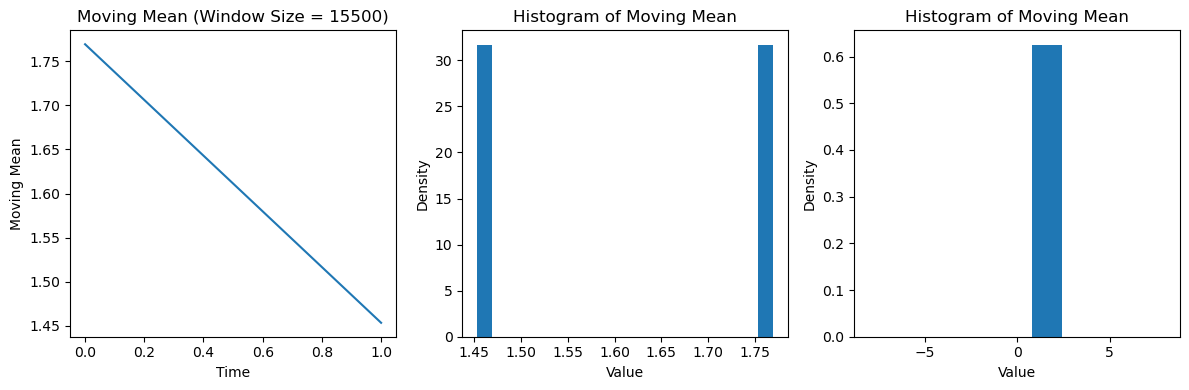

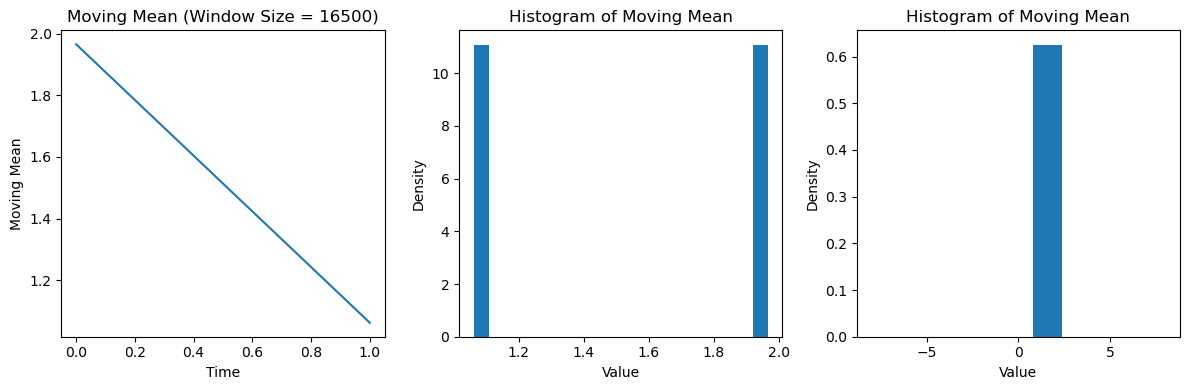

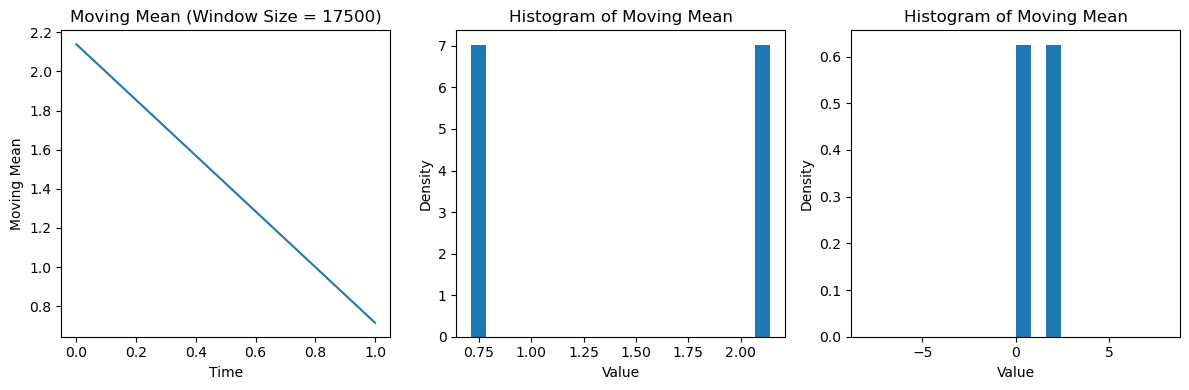

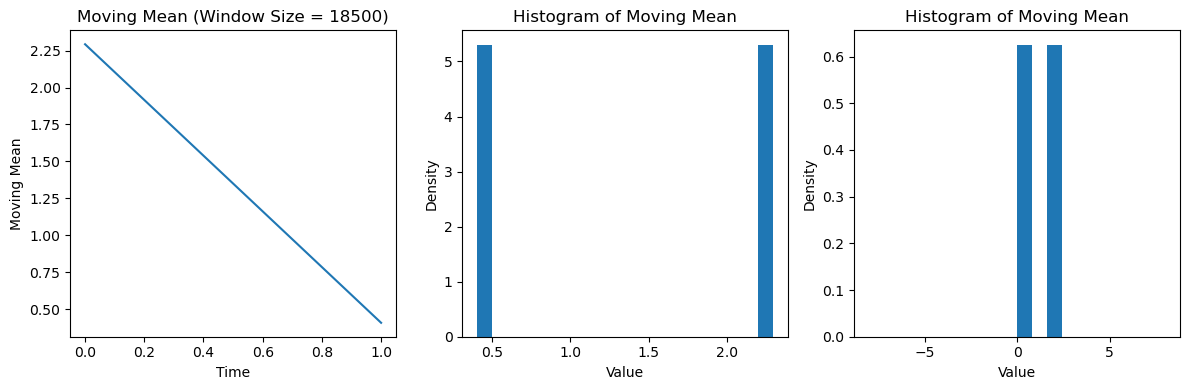

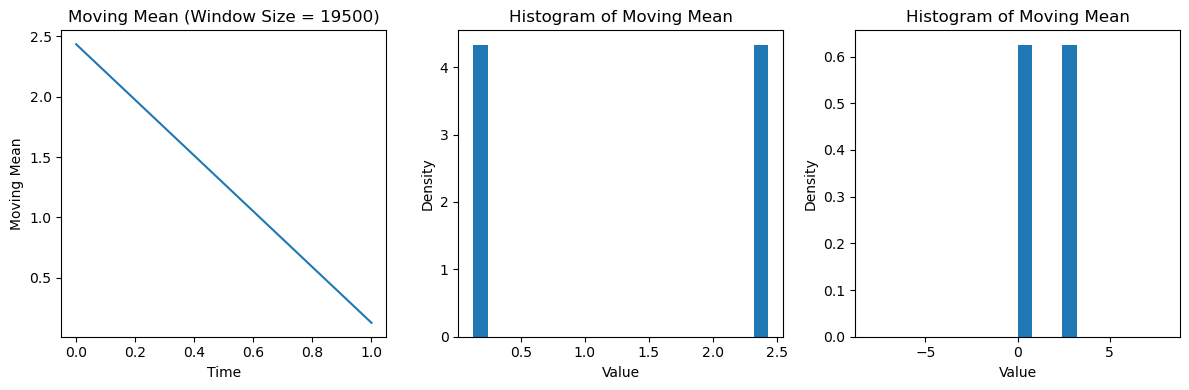

In [285]:
for i in range(500, len(x), 1000):
    calculate_and_plot_moving_mean(x, i, num_bins=20, range_=[-8, 8])

<center>
<img src =data/mrBeanByeBye.gif width = 500 />
</center>